`Neural Network Regression w/TensorFlow`

### Coverage:
* Input/Output shapes of a reg model (features and labels)
* Architecture of a reg model
* Creating custom data to view and fit
* Steps in modelling `create a model, compile, fit, evaluate *CrCoFiEv*`
* Evaluation Methods
* Saving & Loading Models

In [2]:
# lets see how you do comments
import tensorflow as tf
import numpy as np
tf.__version__
import matplotlib.pyplot as plt

2023-01-02 14:44:07.166242: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


`Regression Inputs and Outputs`
* For a Reg problem, the shape of the [output] is normally 1; shape=[1] as we often try to predict some number.

In [ ]:
# Create Features / inputs
X = np.array([-7, -4, -1, 2, 5, 8, 11, 14]) # uppercase 
# create labels
y = np.array([3,6,9,12,15,18,21,24]) #lower case
# visualize
# plt.scatter(X, y)

In [ ]:
# what is the pattern btn the features and the labels
y == X + 10 # this is the relationship our neural net was supposed to learn

`What then might the shapes be for our Input/Output`

In [ ]:
X.shape, y.shape

In [ ]:
X, y

In [ ]:
# create a demo tensor for or housing price prediction problem
house = tf.constant(np.array([[10,11,12,13], [1,2,3,4], [6,7,8,9]]), dtype=tf.float32)
price = tf.constant([1243537])
house, price

In [ ]:
# create demo with a string input
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([12489141])
house_info, house_price

* wanna create a prediction feature : X[0] what is the equivalent y[?]

In [ ]:
# turn the np arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

In [ ]:
X[0].shape, y[0].shape # these are scalar values, have no dimension

### Prediction Feature : Building a model
* Creating a Model : `define input hidden and output layer`
* Compile the model : `define loss function and the optimizer and evaluation metric`
* Fit the Model : `let the model try to find patterns btn X(features) and y(labels)`

In [ ]:
 # set random seed for reproducibility
tf.random.set_seed(42)

# # create a model using the Sequential API - this is a method of going through all things sequentially
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(1)
# ]) # create a list within Sequential Method instead of using .add

model = tf.keras.models.Sequential() # to create a model using Sequential API, shape must be defined
model.add(tf.keras.layers.Input(shape=(1,)))

model.add(tf.keras.layers.Dense(50, activation=None))
# model.add(tf.keras.layers.Dense(50, activation=None))
# model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(1))

# compile the model
model.compile(loss=tf.keras.losses.mae, # mean abs error
            optimizer=tf.keras.optimizers.Adam(lr=0.01), #stochastic gradient descend
            metrics=["mae"]
)

`metrics: human readable and interpretation over the models performance`

In [ ]:
# fit the model - let us find patterns
model.fit(X, y, epochs=2000)

In [ ]:
# make a predction for what x[17] should be
model.predict([17])

In [ ]:
model.predict([12])

`Evaluating a Model` : visualize visualize visualize
* The data - what data are working with
* The Model - what does it look like
* The Training - how it perfomes as it learns
* The Predictions - how they lines up with ground truth (labeled data)

In [8]:
# create a larger model
X = tf.range(-1000, 1000, 4)
# create a larger label : (matmul)
y = tf.multiply(X,X)
X,y

(<tf.Tensor: shape=(500,), dtype=int32, numpy=
 array([-1000,  -996,  -992,  -988,  -984,  -980,  -976,  -972,  -968,
         -964,  -960,  -956,  -952,  -948,  -944,  -940,  -936,  -932,
         -928,  -924,  -920,  -916,  -912,  -908,  -904,  -900,  -896,
         -892,  -888,  -884,  -880,  -876,  -872,  -868,  -864,  -860,
         -856,  -852,  -848,  -844,  -840,  -836,  -832,  -828,  -824,
         -820,  -816,  -812,  -808,  -804,  -800,  -796,  -792,  -788,
         -784,  -780,  -776,  -772,  -768,  -764,  -760,  -756,  -752,
         -748,  -744,  -740,  -736,  -732,  -728,  -724,  -720,  -716,
         -712,  -708,  -704,  -700,  -696,  -692,  -688,  -684,  -680,
         -676,  -672,  -668,  -664,  -660,  -656,  -652,  -648,  -644,
         -640,  -636,  -632,  -628,  -624,  -620,  -616,  -612,  -608,
         -604,  -600,  -596,  -592,  -588,  -584,  -580,  -576,  -572,
         -568,  -564,  -560,  -556,  -552,  -548,  -544,  -540,  -536,
         -532,  -528,  -524,  

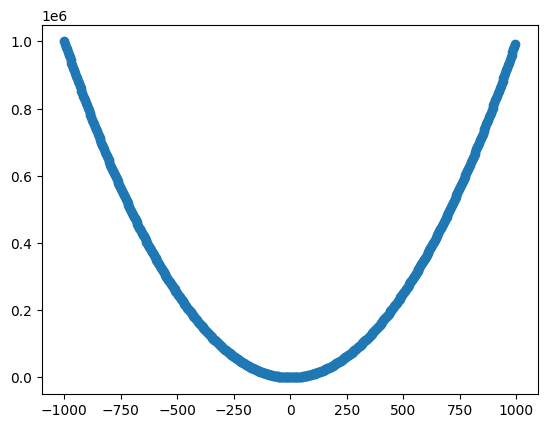

In [9]:
# visualize the data
plt.scatter(X,y)

`split X and y into a training and test set`

In [ ]:
# # use scikit to perform the test and train
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33)

In [10]:
# check the length of our data set
len(X), len(y)

(500, 500)

In [11]:
# spilt into an 80% & 20%
X_train = X[:400] # get the first 40 samples
y_train = y[:400]

X_test = X[400:] # last 10 elements
y_test = y[400:]

len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

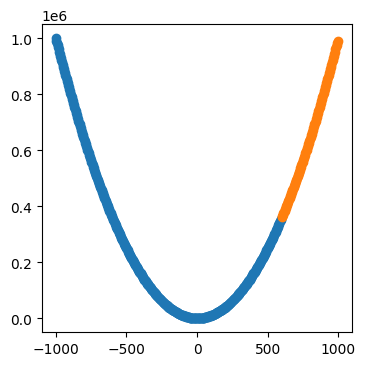

In [12]:
plt.figure(figsize=(4,4))
plt.scatter(X_train, y_train) # train
plt.scatter(X_test, y_test) #test

In [13]:
# Build a Neural Net that learns a relationship btn X and y; such that it can predict the X and y values
# Create -> Compile -> Fit

#1. Create the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]), #we are trying to predict only one input vs output value
])

#2. Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
loss=tf.keras.losses.mae,
metrics=["mae"]
)
#3. Fit the model
# model.fit(X_train, y_train, epochs=2000)

`For visualizing`

In [ ]:
# what type of data are we dealing with - determines the input_shape
# one input for one output
X_train[0], y_train[0] #single numbers

In [ ]:
# set the seed for reproducibility
tf.random.set_seed(42)
# create the model; but specify the input shape on the first layer
viz_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]), # dealing with scalar data
])
# compile the model
viz_model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae,
    metrics=['mae']
    )

In [ ]:
# visualize the model before running it.
viz_model.summary()

In [25]:
# Fit our original model, this is after observing the structure of our model

model.fit(X_train, y_train, epochs=2000, verbose=2) # training_data(X_train), label_data(y_train)

Epoch 1/2000
13/13 - 0s - loss: 177609.5000 - mae: 177609.5000 - 114ms/epoch - 9ms/step
Epoch 2/2000
13/13 - 0s - loss: 177592.6406 - mae: 177592.6406 - 29ms/epoch - 2ms/step
Epoch 3/2000
13/13 - 0s - loss: 177576.2344 - mae: 177576.2344 - 40ms/epoch - 3ms/step
Epoch 4/2000
13/13 - 0s - loss: 177574.4219 - mae: 177574.4219 - 35ms/epoch - 3ms/step
Epoch 5/2000
13/13 - 0s - loss: 177605.3750 - mae: 177605.3750 - 36ms/epoch - 3ms/step
Epoch 6/2000
13/13 - 0s - loss: 177588.0156 - mae: 177588.0156 - 39ms/epoch - 3ms/step
Epoch 7/2000
13/13 - 0s - loss: 177581.5469 - mae: 177581.5469 - 64ms/epoch - 5ms/step
Epoch 8/2000
13/13 - 0s - loss: 177575.5469 - mae: 177575.5469 - 65ms/epoch - 5ms/step
Epoch 9/2000
13/13 - 0s - loss: 177569.8438 - mae: 177569.8438 - 70ms/epoch - 5ms/step
Epoch 10/2000
13/13 - 0s - loss: 177600.5938 - mae: 177600.5938 - 68ms/epoch - 5ms/step
Epoch 11/2000
13/13 - 0s - loss: 177597.7812 - mae: 177597.7812 - 89ms/epoch - 7ms/step
Epoch 12/2000
13/13 - 0s - loss: 177563.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.predict([96])

1/1 [==============================] - 0s 79ms/step


array([[-54452.81]], dtype=float32)

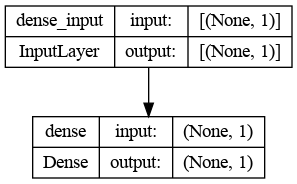

In [19]:
# another visualizing feature
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

##### Proceeding with the viz_model

In [21]:
# set seed for reproducibility
tf.random.set_seed(42)

# create a viz model; Also, going to practise layer and model naming.
viz_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='first_input_layer'),
    tf.keras.layers.Dense(1, name='output_first_input_layer')
], name="Model_for_Visualization")

#compile the model
viz_model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    metrics='mae',
    loss= tf.losses.mae
)

In [22]:
viz_model.summary()

Model: "Model_for_Visualization"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_input_layer (Dense)   (None, 10)                20        
                                                                 
 output_first_input_layer (D  (None, 1)                11        
 ense)                                                           
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


`Visualizing Model Predictions`

In [27]:
y_pred = model.predict(X_test) # predict on the test data
y_pred, y_test # compare the predicted value using the test data using the actual values [y_test]

4/4 [==============================] - 0s 3ms/step


(array([[-341121.8 ],
        [-343396.97],
        [-345672.12],
        [-347947.28],
        [-350222.44],
        [-352497.56],
        [-354772.72],
        [-357047.88],
        [-359323.03],
        [-361598.2 ],
        [-363873.3 ],
        [-366148.47],
        [-368423.62],
        [-370698.78],
        [-372973.94],
        [-375249.1 ],
        [-377524.22],
        [-379799.38],
        [-382074.53],
        [-384349.7 ],
        [-386624.84],
        [-388900.  ],
        [-391175.12],
        [-393450.28],
        [-395725.44],
        [-398000.6 ],
        [-400275.75],
        [-402550.9 ],
        [-404826.03],
        [-407101.2 ],
        [-409376.34],
        [-411651.5 ],
        [-413926.66],
        [-416201.8 ],
        [-418476.94],
        [-420752.1 ],
        [-423027.25],
        [-425302.4 ],
        [-427577.56],
        [-429852.72],
        [-432127.84],
        [-434403.  ],
        [-436678.16],
        [-438953.3 ],
        [-441228.47],
        [-

`Create a Plotting Function`

In [28]:
def plot_prediction(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions=y_pred):

    """
    Plots training_data, test_data and compares prediction to ground truth labels [y_test]
    """
    plt.figure(figsize=(5,5))
    # plot the traing data
    plt.scatter(train_data, train_labels, label="Training_Data")
    # # plot the testing data
    # plt.scatter(test_data, test_labels, "Testing_Data")
    # # plot the predictions
    plt.scatter(test_data, predictions)
    # plt.legend();
    # plt.show()

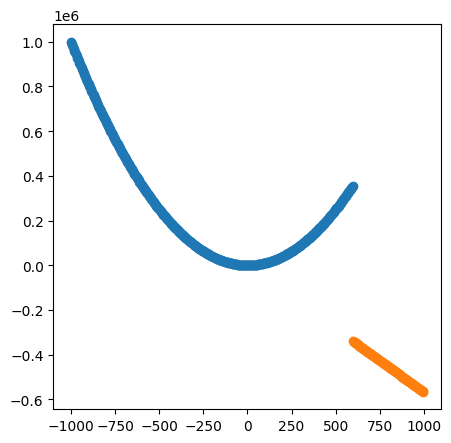

In [29]:
# call the function
plot_prediction()